In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\Users\stain\anaconda\envs\geospatial\python.exe"
  * The NumPy version is: "1.20.1"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


In [5]:
gdp_df = pd.read_csv('./data/gdp_percapita.csv',nrows= 6606)
gdp_df.shape

NameError: name 'pd' is not defined

In [26]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,2190.240321,NaN
1,Afghanistan,2017,2202.570851,NaN
2,Afghanistan,2016,2200.764487,NaN
3,Afghanistan,2015,2212.750899,NaN
4,Afghanistan,2014,2249.253738,NaN


In [27]:
type(gdp_df)

pandas.core.frame.DataFrame

In [28]:
internet_df = pd.read_csv('./data/internet_use.csv', nrows= 4495)
internet_df.shape

(4495, 4)

In [29]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [30]:
type(internet_df)

pandas.core.frame.DataFrame

In [59]:
print(gdp_df.info)

<bound method DataFrame.info of           Country  Year  GDP_Per_Capita
0     Afghanistan  2018     2190.240321
1     Afghanistan  2017     2202.570851
2     Afghanistan  2016     2200.764487
3     Afghanistan  2015     2212.750899
4     Afghanistan  2014     2249.253738
...           ...   ...             ...
6601     Zimbabwe  1994     3263.934978
6602     Zimbabwe  1993     3033.504852
6603     Zimbabwe  1992     3054.889178
6604     Zimbabwe  1991     3426.598094
6605     Zimbabwe  1990     3324.348171

[6606 rows x 3 columns]>


In [66]:
print(internet_df.info())
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6606 non-null   object 
 1   Year            6606 non-null   int64  
 2   GDP_Per_Capita  6606 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 155.0+ KB
None


In [61]:
print(gdp_df.head())
print(internet_df.head())
print(gdp_df.tail())
print(internet_df.tail())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2018     2190.240321
1  Afghanistan  2017     2202.570851
2  Afghanistan  2016     2200.764487
3  Afghanistan  2015     2212.750899
4  Afghanistan  2014     2249.253738
       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000
       Country  Year  GDP_Per_Capita
6601  Zimbabwe  1994     3263.934978
6602  Zimbabwe  1993     3033.504852
6603  Zimbabwe  1992     3054.889178
6604  Zimbabwe  1991     3426.598094
6605  Zimbabwe  1990     3324.348171
       Country  Year  Internet_Users_Pct
4490  Zimbabwe  1997            0.033080
4491  Zimbabwe  1996            0.016790
4492  Zimbabwe  1995            0.007684
4493  Zimbabwe  1994            0.001739
4494  Zimbabwe  1990            0.000000


In [62]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [34]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [35]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [36]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [37]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value' : 'GDP_Per_Capita'})

In [38]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [39]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value' : 'Internet_Users_Pct'})

In [68]:
gdp_and_internet_us = pd.merge(gdp_df, internet_df,                            
                               how = 'outer', indicator = True)
gdp_and_internet_us.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
0,Afghanistan,2018,2190.240321,NaN,left_only
1,Afghanistan,2017,2202.570851,NaN,left_only
2,Afghanistan,2016,2200.764487,NaN,left_only
3,Afghanistan,2015,2212.750899,NaN,left_only
4,Afghanistan,2014,2249.253738,6.390000,both
5,Afghanistan,2013,2264.317575,5.900000,both
6,Afghanistan,2012,2220.481526,5.454545,both
7,Afghanistan,2011,2037.608607,5.000000,both
8,Afghanistan,2010,2093.743565,4.000000,both
9,Afghanistan,2009,1881.777626,3.550000,both


In [41]:
gdp_and_internet_us.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3432,Zimbabwe,1997,3580.048793,0.033080
3433,Zimbabwe,1996,3520.430146,0.016790
3434,Zimbabwe,1995,3226.413930,0.007684
3435,Zimbabwe,1994,3263.934978,0.001739
3436,Zimbabwe,1990,3324.348171,0.000000


In [42]:
#gdp_and_internet_us.Year
gdp_and_internet_us_sub = gdp_and_internet_us.loc[(gdp_and_internet_us.Year == '2014')]
#indicators = indicators.loc[(indicators.system_name == 'Davidson County') & (indicators.subgroup == 'All Students')]

In [43]:
gdp_and_internet_us_sub.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct


In [44]:
#gdp_and_internet_us.loc[(gdp_and_internet_us.Year ==  2004)| (gdp_and_internet_us.Year ==  2009)]
#gdp_and_internet_us.loc[gdp_and_internet_us.Year.isin ([2004, 2009, 2014])]
#gdp_and_internet_use.query('Year == 2004 or Year == 2009 or Year == 2014')
#in, using list.


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2249.253738,6.390000
5,Afghanistan,2009,1881.777626,3.550000
10,Afghanistan,2004,1284.127338,0.105809
13,Albania,2014,11828.232264,60.100000
18,Albania,2009,10528.778102,41.200000
...,...,...,...,...
3398,Zambia,2009,2917.522504,6.310000
3403,Zambia,2004,2261.771409,2.013550
3415,Zimbabwe,2014,2955.240287,19.890000
3420,Zimbabwe,2009,1925.364381,11.360000


In [69]:
g_i_2014 = gdp_and_internet_us.loc[gdp_and_internet_us.Year.isin ([2014])]
g_i_2009 = gdp_and_internet_us.loc[gdp_and_internet_us.Year.isin ([2009])]
g_i_2004 = gdp_and_internet_us.loc[gdp_and_internet_us.Year.isin ([2004])]

In [70]:
g_i_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
4,Afghanistan,2014,2249.253738,6.39,both
21,Albania,2014,11828.232264,60.10,both
50,Algeria,2014,11329.428688,18.09,both
79,Angola,2014,8239.832077,21.26,both
108,Antigua and Barbuda,2014,18104.241470,64.00,both


In [71]:
g_i_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
9,Afghanistan,2009,1881.777626,3.55,both
26,Albania,2009,10528.778102,41.20,both
55,Algeria,2009,10610.711405,11.23,both
84,Angola,2009,7610.310423,6.00,both
113,Antigua and Barbuda,2009,19989.092913,42.00,both


In [72]:
g_i_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
14,Afghanistan,2004,1284.127338,0.105809,both
31,Albania,2004,7738.542836,2.420388,both
60,Algeria,2004,9898.310490,4.634475,both
89,Angola,2004,5568.959139,0.464815,both
118,Antigua and Barbuda,2004,18742.463741,24.266544,both


In [48]:
g_i_2014.sort_values('Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1360,Iceland,2014,49911.069825,98.16
2275,Norway,2014,61308.763730,96.30
833,Denmark,2014,52172.606425,95.99
1777,Luxembourg,2014,108911.348894,94.67
2164,Netherlands,2014,52432.619199,93.17
...,...,...,...,...
2707,Sierra Leone,2014,1997.511853,2.10
2235,Niger,2014,1126.153622,1.95
1240,Guinea,2014,2063.411291,1.72
519,Burundi,2014,886.235777,1.38


In [85]:
#g_i_2009.sort_values('Internet_Users_Pct', ascending=False).head(1)
#gdp_and_internet_use_2014.nlargest(1, 'Internet_Users_Pct')
print(g_i_2014[g_i_2014['Internet_Users_Pct']\
    ==g_i_2014['Internet_Users_Pct'].max()])
print(g_i_2014[g_i_2014['Internet_Users_Pct']\
    ==g_i_2014['Internet_Users_Pct'].min()])
#Study the .max func



      Country  Year  GDP_Per_Capita  Internet_Users_Pct _merge
2507  Iceland  2014    49911.069825               98.16   both
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6838  Dem. People's Rep. of Korea  2014             NaN                 0.0   

          _merge  
6838  right_only  


In [83]:
#g_i_2004.sort_values('Internet_Users_Pct', ascending=False).tail(1)
print(g_i_2009[g_i_2009['Internet_Users_Pct']\
    ==g_i_2009['Internet_Users_Pct'].max()])
print(g_i_2009[g_i_2009['Internet_Users_Pct']\
    ==g_i_2009['Internet_Users_Pct'].min()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct _merge
2512  Iceland  2009    48428.312438                93.0   both
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6842  Dem. People's Rep. of Korea  2009             NaN                 0.0   

          _merge  
6842  right_only  


In [89]:
print(g_i_2004[g_i_2004['Internet_Users_Pct']\
    ==g_i_2004['Internet_Users_Pct'].max()])
print('===================================================================================')
print(g_i_2004[g_i_2004['Internet_Users_Pct']\
    ==g_i_2004['Internet_Users_Pct'].min()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct _merge
5785  Sweden  2004    45029.814344               83.89   both
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6847  Dem. People's Rep. of Korea  2004             NaN                 0.0   

          _merge  
6847  right_only  


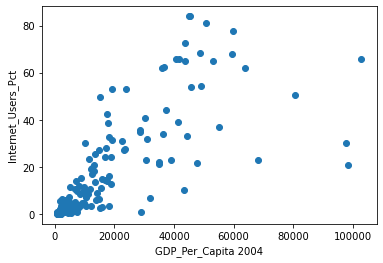

In [50]:
plt.scatter(x = 'GDP_Per_Capita', y ='Internet_Users_Pct', data = g_i_2004)
plt.xlabel('GDP_Per_Capita 2004')
plt.ylabel('Internet_Users_Pct');

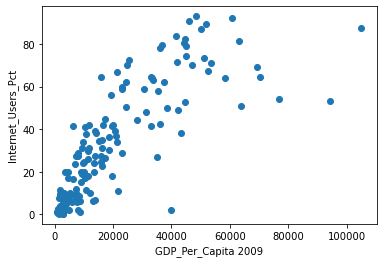

In [51]:
plt.scatter(x = 'GDP_Per_Capita', y ='Internet_Users_Pct', data = g_i_2009)
plt.xlabel('GDP_Per_Capita 2009')
plt.ylabel('Internet_Users_Pct');

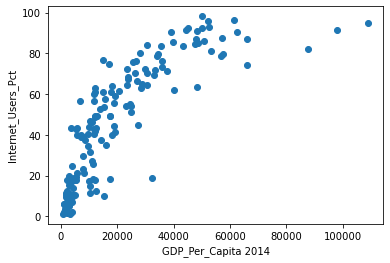

In [52]:
plt.scatter(x = 'GDP_Per_Capita', y ='Internet_Users_Pct', data = g_i_2014)
plt.xlabel('GDP_Per_Capita 2014')
plt.ylabel('Internet_Users_Pct');

Internet users increase by year.

C:\Users\stain\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


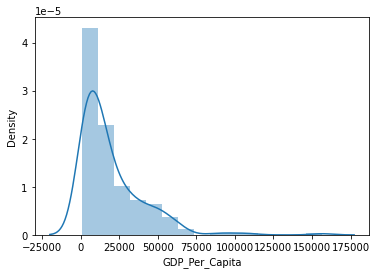

In [96]:
sns.distplot(g_i_2014['GDP_Per_Capita'], bins=15);


C:\Users\stain\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


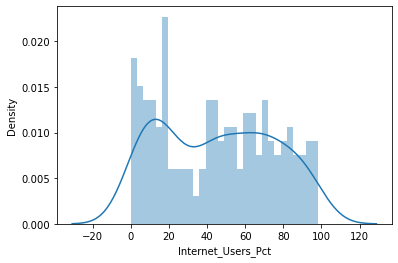

In [101]:
sns.distplot(g_i_2014['Internet_Users_Pct'], bins=30);

In [103]:
g_i_2014.sort_values('Internet_Users_Pct', ascending=False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
2507,Iceland,2014,49911.069825,98.16,both
6649,Bermuda,2014,NaN,96.80,right_only
4461,Norway,2014,61308.763730,96.30,both
1374,Denmark,2014,52172.606425,95.99,both
6609,Andorra,2014,NaN,95.90,right_only


In [104]:
g_i_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
4,Afghanistan,2014,2249.253738,6.39,both
21,Albania,2014,11828.232264,60.10,both
50,Algeria,2014,11329.428688,18.09,both
79,Angola,2014,8239.832077,21.26,both
108,Antigua and Barbuda,2014,18104.241470,64.00,both
...,...,...,...,...,...
7520,T.F.Y.R. Macedonia,2014,NaN,68.06,right_only
7578,Venezuela,2014,NaN,57.00,right_only
7602,Viet Nam,2014,NaN,48.31,right_only
7622,Virgin Islands (U.S.),2014,NaN,50.07,right_only


In [116]:
top_5_c = g_i_2014.sort_values('Internet_Users_Pct', ascending=False).head()['Country']

In [117]:
top_5_i = g_i_2014.sort_values('Internet_Users_Pct', ascending=False).head()['Country'].isin(top_5_c)

In [124]:
top_5_i.head()

2507    True
6649    True
4461    True
1374    True
6609    True
Name: Country, dtype: bool

In [1]:
g= sns.FacetGrid(top_5_i, col = 'Country')
g.map (plt.plot, 'Year', 'Internet_Users_Pct')
g.add_legend();

NameError: name 'sns' is not defined

In [ ]:
#bottom_5_countries = gdp_and_internet_use_2014.sort_values('Internet_Users_Pct').head()['Country']
#bottom_5_internet = gdp_and_internet_use_sub[gdp_and_internet_use_sub['Country'].isin(bottom_5_countries)]
#bottom_5_internet = bottom_5_internet.sort_values(['Country', 'Year'])
#bottom_5_internet['Year'] = bottom_5_internet['Year'].astype(int)
#g = sns.FacetGrid(bottom_5_internet, col = 'Country')
#g.map(plt.plot, 'Year', 'Internet_Users_Pct')
#g.set(xticks = [2004, 2009, 2014])
#g.add_legend();
